In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
stock_data = pd.read_csv("data.csv")

In [2]:
stock_data.head(2)

,Date,BTC,ETH,XRP,USDT,BSV,BCH,LTC,EOS,BNB,ADA,BTCTOMORROW
0,43413,6385.62,210.07,0.50,0.99,68.75,544.42,51.9,5.38,9.55,0.07,6409.22
1,43414,6409.22,212.53,0.51,1.00,87.06,556.50,52.4,5.42,9.56,0.08,6411.27


In [3]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 673 entries, 0 to 672
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         673 non-null    int64  
 1   BTC          673 non-null    float64
 2   ETH          673 non-null    float64
 3   XRP          673 non-null    float64
 4   USDT         673 non-null    float64
 5   BSV          673 non-null    float64
 6   BCH          673 non-null    float64
 7   LTC          673 non-null    float64
 8   EOS          673 non-null    float64
 9   BNB          673 non-null    float64
 10  ADA          673 non-null    float64
 11  BTCTOMORROW  673 non-null    float64
dtypes: float64(11), int64(1)
memory usage: 63.2 KB


In [11]:
input_feature= stock_data[['BTC', 'ETH', 'XRP', 'USDT', 'BSV', 'BCH', 'LTC', 'EOS', 'BNB', 'ADA']].values
input_data = input_feature

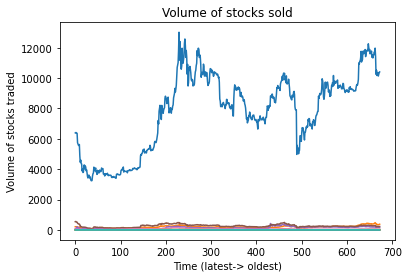

In [12]:
plt.plot(input_feature)
plt.title("Volume of stocks sold")
plt.xlabel("Time (latest-> oldest)")
plt.ylabel("Volume of stocks traded")
plt.show()

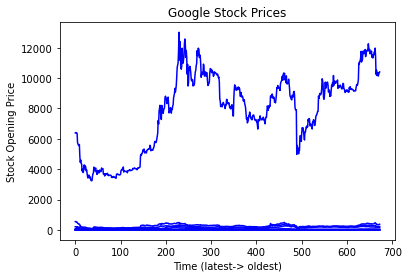

In [13]:
plt.plot(input_feature, color='blue')
plt.title("Google Stock Prices")
plt.xlabel("Time (latest-> oldest)")
plt.ylabel("Stock Opening Price")
plt.show()

In [15]:
from sklearn.preprocessing import MinMaxScaler
sc= MinMaxScaler(feature_range=(0,1))
input_data = sc.fit_transform(input_feature)

In [16]:
lookback= 50

test_size=int(.3 * len(stock_data))
X=[]
y=[]
for i in range(len(stock_data)-lookback-1):
    t=[]
    for j in range(0,lookback):
        
        t.append(input_data[[(i+j)], :])
    X.append(t)
    y.append(input_data[i+ lookback,1])

In [17]:
# X, y= np.array(X), np.array(y)
# X_test = X[:test_size+lookback]
# X = X.reshape(X.shape[0],lookback, 2)
# X_test = X_test.reshape(X_test.shape[0],lookback, 2)
# print(X.shape)
# print(X_test.shape)

ValueError: cannot reshape array of size 311000 into shape (622,50,2)

In [18]:
from keras import Sequential
from keras.layers import Dense, LSTM

Using TensorFlow backend.


In [19]:
model = Sequential()
model.add(LSTM(units=30, return_sequences= True, input_shape=(X.shape[1],2)))
model.add(LSTM(units=30, return_sequences=True))
model.add(LSTM(units=30))
model.add(Dense(units=1))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 50, 30)            3960      
_________________________________________________________________
lstm_2 (LSTM)                (None, 50, 30)            7320      
_________________________________________________________________
lstm_3 (LSTM)                (None, 30)                7320      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 31        
Total params: 18,631
Trainable params: 18,631
Non-trainable params: 0
_________________________________________________________________


In [20]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [21]:
model.fit(X, y, epochs=200, batch_size=32)

ValueError: Error when checking input: expected lstm_1_input to have 3 dimensions, but got array with shape (622, 50, 1, 10)

In [ ]:
predicted_value= model.predict(X_test)

In [ ]:
plt.plot(predicted_value, color= 'red')
plt.plot(input_data[lookback:test_size+(2*lookback),1], color='green')
plt.title("Opening price of stocks sold")
plt.xlabel("Time (latest-> oldest)")
plt.ylabel("Stock Opening Price")
plt.show()